In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

plt.style.use('seaborn-dark-palette')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

# GEO data processing

In [3]:
distritos = gpd.read_file('../data/geo_data/portugal/distritos_shape/distritos.shp')
distritos = distritos.drop(columns={'ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1', 'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'})
distritos = distritos.rename(columns={'NAME_1':'Name'})
distritos = distritos.drop([distritos.index[2], distritos.index[12]])
distritos.to_file("../data/geo_data/portugal/distritos_shape.shp")
distritos.to_csv('../data/geo_data/portugal/distritos_shape.csv', encoding='utf-16', index=False)

In [15]:
distritos = distritos.drop([distritos.index[2], distritos.index[12]])
distritos

,Name,geometry
0,Évora,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466..."
1,Aveiro,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40..."
4,Braga,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543..."
5,Bragança,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859..."
6,Castelo Branco,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438..."
7,Coimbra,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153..."
8,Faro,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
9,Guarda,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40..."
10,Leiria,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39..."
11,Lisboa,"MULTIPOLYGON (((-9.29903 38.66180, -9.29903 38..."


<AxesSubplot:>

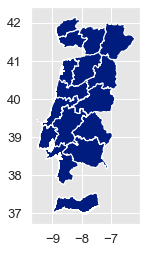

In [16]:
distritos.plot()

In [5]:
dist_conc = pd.read_excel('../data/geo_data/portugal/distritos_concelhos.xlsx')
dist_conc.head()

,Distrito,Concelhos
0,Aveiro,Águeda
1,Aveiro,Albergaria-a-Velha
2,Aveiro,Anadia
3,Aveiro,Arouca
4,Aveiro,Aveiro


# Turismo

In [7]:
tourism = pd.read_excel('../data/population/portugal/turismo_by_concelho.xlsx')
tourism.head()

,Concelho,2013,2014,2015,2016,2017,2018,2019
0,Portugal,1954569,2285896,2627741,3103755,3681207,3986553,4295814
1,Continente,1637632,1940146,2240348,2643565,3170774,3454783,3771242
2,Norte,223778,271117,329973,403945,489312,560283,642935
3,Alto Minho,14370,16878,21263,25328,32230,37444,40835
4,Arcos de Valdevez,795,856,1266,2665,2937,3451,3420


In [9]:
df = tourism.merge(dist_conc, how='inner', left_on='Concelho', right_on='Concelhos')
df = df.drop(columns={'Concelho', 'Concelhos'})
df = df.groupby(['Distrito'], as_index=False).sum()
df.to_excel('../data/population/portugal/turismo_by_distrito.xlsx', encoding='utf_16', index=False)
df.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,20082,29712,33058,42145,49789,52679,62484
1,Açores,107052,121080,140407,169402,199269,222553,240588
2,Beja,5477,15330,19751,22623,27106,29187,35056
3,Braga,27992,36721,41209,48416,58852,66479,76363
4,Bragança,4519,6002,7280,8121,8673,10128,11473


# Water

In [38]:
water = pd.read_excel('../data/water/portugal/water_consumption_m3_per_inhabitant.xlsx')
water

,Region,2013,2014,2015,2016,2017,2018,2019
0,Portugal,61.5,61.6,63.6,64.4,66.3,64.4,65.4
1,Continente,60.0,60.2,62.2,62.6,64.5,62.3,63.8
2,Norte,41.5,41.2,42.2,43.4,44.9,44.2,45.1
3,Alto Minho,47.6,45.6,46.7,44.6,48.7,49.5,48.2
4,Arcos de Valdevez,36.1,37.0,42.1,41.3,45.2,45.6,45.2
...,...,...,...,...,...,...,...,...
348,Santa Cruz,53.3,54.4,54.6,54.8,56.2,55.0,58.1
349,Santana,72.2,69.7,69.5,72.3,72.3,68.7,67.9
350,São Vicente,65.1,71.7,81.8,83.1,83.0,83.5,74.4
351,Ilha de Porto Santo,124.8,113.6,126.9,122.7,137.2,139.7,148.2


In [39]:
df = water.merge(dist_conc, how='inner', left_on='Region', right_on='Concelhos')
df.head()

,Region,2013,2014,2015,2016,2017,2018,2019,Distrito,Concelhos
0,Arcos de Valdevez,36.1,37.0,42.1,41.3,45.2,45.6,45.2,Viana do Castelo,Arcos de Valdevez
1,Caminha,64.6,61.4,64.3,67.0,68.3,67.2,66.3,Viana do Castelo,Caminha
2,Paredes de Coura,41.6,40.6,44.5,48.2,55.8,53.1,51.8,Viana do Castelo,Paredes de Coura
3,Ponte da Barca,29.8,37.2,30.2,30.6,39.2,33.8,34.2,Viana do Castelo,Ponte da Barca
4,Ponte de Lima,34.7,34.0,33.0,35.1,41.2,53.1,45.4,Viana do Castelo,Ponte de Lima


In [40]:
df = df.drop(columns={'Region', 'Concelhos'})
df.head()

,2013,2014,2015,2016,2017,2018,2019,Distrito
0,36.1,37.0,42.1,41.3,45.2,45.6,45.2,Viana do Castelo
1,64.6,61.4,64.3,67.0,68.3,67.2,66.3,Viana do Castelo
2,41.6,40.6,44.5,48.2,55.8,53.1,51.8,Viana do Castelo
3,29.8,37.2,30.2,30.6,39.2,33.8,34.2,Viana do Castelo
4,34.7,34.0,33.0,35.1,41.2,53.1,45.4,Viana do Castelo


In [72]:
df = df.groupby(['Distrito'], as_index=False).sum()

In [50]:
df.to_excel('../data/water/portugal/water_consumption_by_district.xlsx', encoding='utf_16', index=False)

In [71]:
total_water = pd.read_excel('../data/water/portugal/total_water_consumption_by_region.xlsx')
total_water.head()

,Years,2013,2014,2015,2016,2017,2018,2019
0,Portugal,643229,641087,658516,664844,683399,662561,672634
1,Continente,597137,595151,613210,615148,632345,610033,625009
2,Norte,151650,149790,152463,155847,160617,158105,161133
3,Alto Minho,11469,10899,11079,10494,11351,11454,11120
4,Arcos de Valdevez,805,815,917,887,960,960,947


In [76]:
df_3 = total_water.merge(dist_conc, how='inner', left_on='Years', right_on='Concelhos')
df_3 = df_3.drop(columns=['Years', 'Concelhos'])
df_3 = df_3.groupby(['Distrito'], as_index=False).sum()
df_3.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,26224,25920,27203,27608,29170,29114,29688
1,Açores,20430,21771,20740,27873,25446,27411,23042
2,Beja,8384,8255,8422,8280,8770,8527,8880
3,Braga,30444,29625,30971,31758,33590,33006,33203
4,Bragança,8652,9217,9358,9236,9203,8902,8815


In [77]:
df_3.to_excel('../data/water/portugal/total_water_consumption_by_district.xlsx', encoding='utf_16', index=False)

# Electricity

In [82]:
dist_conc.head()

,Distrito,Concelhos
0,Aveiro,Águeda
1,Aveiro,Albergaria-a-Velha
2,Aveiro,Anadia
3,Aveiro,Arouca
4,Aveiro,Aveiro


In [68]:
el = pd.read_excel('../data/electricity/portugal/electricity_consumption_by_region_per_capita.xlsx')
el.head()

,Concelho,2013,2014,2015,2016,2017,2018,2019,2020
0,Portugal,4420.9,4436.7,4522.2,4586.7,4627.3,4754.4,4745.2,4574.5
1,Continente,4495.2,4510.6,4598.8,4664.3,4705.1,4837.3,4825.6,4652.0
2,Norte,3901.6,3915.6,4003.1,4102.6,4121.0,4231.6,4194.3,4068.7
3,Alto Minho,4163.6,4185.4,4314.0,4495.6,4491.0,4732.5,4810.9,4727.9
4,Arcos de Valdevez,3865.2,4004.1,4315.9,5020.1,5144.0,5544.7,5540.4,5383.3


In [69]:
df_2 = el.merge(dist_conc, how='inner', left_on='Concelho', right_on='Concelhos')
df_2 = df_2.drop(columns={'Concelho', 'Concelhos'})
df_2 = df_2.groupby(['Distrito'], as_index=False).sum()
df_2.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019,2020
0,Aveiro,95068.3,98185.2,102134.5,103346.9,105032.3,112834.3,112227.2,106217.1
1,Açores,45919.0,46086.2,47159.3,49623.6,50206.6,50913.1,50870.9,49628.9
2,Beja,91584.9,94044.0,100837.5,103539.1,108704.3,115396.8,123256.0,119859.4
3,Braga,43130.5,42839.9,44358.9,46041.8,46408.6,47582.6,47377.0,45669.1
4,Bragança,35040.8,34246.8,35589.8,36327.8,36681.8,38963.9,40952.6,38758.3


In [70]:
df_2.to_excel('../data/electricity/portugal/el_consumption_per_capita_by_district.xlsx', index=False)

In [85]:
el_domestic =pd.read_excel('../data/electricity/portugal/electircity_domestic_consumption_by_region.xlsx')
el_domestic.head()

,Concelho,2013,2014,2015,2016,2017,2018,2019
0,Portugal,12311175508,12804302154,12756317875,12940175792,12525742998,13238551978,13029037954
1,Continente,11820461152,12307634437,12265607349,12441976257,12037440679,12732611877,12520127929
2,Norte,4348075088,4521682826,4482659623,4572005618,4382602275,4590900071,4494673798
3,Alto Minho,276142349,303547933,305122227,313465043,302757934,306093049,296720510
4,Arcos de Valdevez,22696416,35457462,36667054,37912018,36337488,26211217,25057903


In [86]:
df_2 = el_domestic.merge(dist_conc, how='inner', left_on='Concelho', right_on='Concelhos')
df_2 = df_2.drop(columns={'Concelho', 'Concelhos'})
df_2 = df_2.groupby(['Distrito'], as_index=False).sum()
df_2.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,778720060,865895425,866809074,875545569,826032429,865751522,847597260
1,Açores,261478554,258057724,260714465,267143204,265055539,270278613,273618964
2,Beja,165994661,177779408,180390158,182226597,176840996,183992335,183025592
3,Braga,897186659,954513022,949280833,980741127,939424471,991035164,969695981
4,Bragança,157872352,168485239,165138017,168508730,160159271,164195561,162050759


In [87]:
df_2.to_excel('../data/electricity/portugal/el_consumption_domestic_by_district.xlsx', index=False)

In [89]:
el_ind =pd.read_excel('../data/electricity/portugal/electricity_industry_consumption_by_region.xlsx')
df_2 = el_ind.merge(dist_conc, how='inner', left_on='Concelho', right_on='Concelhos')
df_2 = df_2.drop(columns={'Concelho', 'Concelhos'})
df_2 = df_2.groupby(['Distrito'], as_index=False).sum()
df_2.to_excel('../data/electricity/portugal/el_consumption_industry_by_district.xlsx', index=False)

# COVID data processing

In [89]:
covid = pd.read_csv('../data/covid/portugal/data_portugal.csv', encoding = "ISO-8859-1", usecols=['data', 'Total']).rename(columns={'data':'Month', 'Total': 'Covid cases'})
covid['Month'] = pd.DatetimeIndex(pd.to_datetime(covid['Month'])).month
covid = covid.groupby(['Month'], as_index=False).sum()
covid

,Month,Covid cases
0,1,96258
1,2,97912
2,3,175737
3,4,421345
4,5,689533
5,6,742240
6,7,291696
7,8,218765
8,9,254587
9,10,301104


In [90]:
months={'Code': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']}

In [91]:
months = pd.DataFrame.from_dict(months) 
months

,Code,Name
0,1,Jan
1,2,Feb
2,3,Mar
3,4,Apr
4,5,May
5,6,Jun
6,7,Jul
7,8,Aug
8,9,Sep
9,10,Oct


In [92]:
covid = covid.merge(months, left_on='Month', right_on='Code')
covid


,Month,Covid cases,Code,Name
0,1,96258,1,Jan
1,2,97912,2,Feb
2,3,175737,3,Mar
3,4,421345,4,Apr
4,5,689533,5,May
5,6,742240,6,Jun
6,7,291696,7,Jul
7,8,218765,8,Aug
8,9,254587,9,Sep
9,10,301104,10,Oct


In [93]:
covid = covid.drop(columns=['Month', 'Code']).rename(columns={'Name': 'Month'})
covid

,Covid cases,Month
0,96258,Jan
1,97912,Feb
2,175737,Mar
3,421345,Apr
4,689533,May
5,742240,Jun
6,291696,Jul
7,218765,Aug
8,254587,Sep
9,301104,Oct


In [97]:
covid.to_csv('../data/covid/portugal/portugal_covid_cases_2020.csv', index=False)

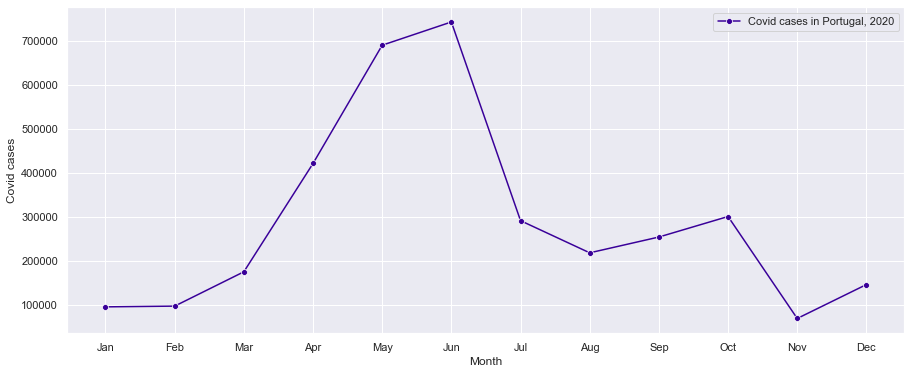

In [116]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(x=covid.Month, y=covid['Covid cases'], label="Covid cases in Portugal, 2020", marker = 'o', color='#390099')
plt.savefig('../charts/analysis_portugal/portugal_covid_cases_2020.png')
plt.show(block=True)

# Water Data Processing

In [119]:
water = pd.read_excel('../data/water/portugal/water_consumption_m3_per_inhabitant.xlsx')
water

,Region,2013,2014,2015,2016,2017,2018,2019
0,Portugal,61.5,61.6,63.6,64.4,66.3,64.4,65.4
1,Continente,60.0,60.2,62.2,62.6,64.5,62.3,63.8
2,Norte,41.5,41.2,42.2,43.4,44.9,44.2,45.1
3,Alto Minho,47.6,45.6,46.7,44.6,48.7,49.5,48.2
4,Arcos de Valdevez,36.1,37.0,42.1,41.3,45.2,45.6,45.2
...,...,...,...,...,...,...,...,...
348,Santa Cruz,53.3,54.4,54.6,54.8,56.2,55.0,58.1
349,Santana,72.2,69.7,69.5,72.3,72.3,68.7,67.9
350,São Vicente,65.1,71.7,81.8,83.1,83.0,83.5,74.4
351,Ilha de Porto Santo,124.8,113.6,126.9,122.7,137.2,139.7,148.2


# Electricity Data Processing

In [121]:
el = pd.read_excel('../data/electricity/portugal/electricity_consumption_per_capita.xlsx')
el.head()

,Years,Total,Domestic,Non-domestic,Industry,Agriculture,Street lighting,Government buildings
0,2013,4420.9,1177.3,1162.6,1629.2,88.5,140.6,194.5
1,2014,4436.7,1231.1,1106.2,1690.9,79.7,142.1,146.7
2,2015,4522.2,1231.5,1122.3,1739.4,87.9,142.2,157.5
3,2016,4586.7,1253.2,1151.9,1753.7,86.6,141.3,158.8
4,2017,4627.3,1216.1,1144.9,1818.3,103.5,140.9,157.4
5,2018,4754.4,1287.3,1158.5,1854.9,106.0,137.5,162.4
6,2019,4745.2,1266.6,1165.2,1876.5,104.6,127.8,155.7
7,2020,4574.5,1321.0,1056.9,1804.4,97.9,122.6,131.9


# Geo data of Portugal

In [42]:
concelhos = pd.read_excel('../data/geo_data/concelhos.xlsx')
concelhos.head(20)

,Concelhos
0,ABRANTES
1,AGUIAR DA BEIRA
2,ALANDROAL
3,ALBERGARIA-A-VELHA
4,ALBUFEIRA
5,ALCANENA
6,ALCOBAÇA
7,ALCOCHETE
8,ALCOUTIM
9,ALCÁCER DO SAL


In [43]:
concelhos['Concelhos'] = concelhos['Concelhos'].apply(lambda x: x[0] + x[1:len(x)].lower())
concelhos.head()

,Concelhos
0,Abrantes
1,Aguiar da beira
2,Alandroal
3,Albergaria-a-velha
4,Albufeira


In [49]:
concelhos.to_csv('../data/geo_data/concelhos.csv',  encoding = 'utf-16', index=False)